In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import data into Python environment.

In [3]:
df1 = pd.read_csv("D:\PYTHON Programing\Comcast_telecom_complaints_data.csv",index_col=0)

In [4]:
df1.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Ticket #,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
df1[df1.isnull()].count()

Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [6]:
df1.describe(include='all')

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,1841,91,91,2190,2,928,43,NaN,4,2
top,Comcast,24-06-15,24-Jun-15,12:41:14 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 250635 to 363614
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer Complaint           2224 non-null   object
 1   Date                         2224 non-null   object
 2   Date_month_year              2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 191.1+ KB


In [8]:
# TASK 1 - Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [9]:
df1['Date_month_year'] = pd.to_datetime(df1['Date_month_year'])
df1['Created_Month'] =  df1['Date_month_year'].apply(lambda x: x.month)
df1['Created_Day'] = df1['Date_month_year'].apply(lambda x: x.day)
df1['Created_Day of Week'] = df1['Date_month_year'].apply(lambda x: x.dayofweek)

In [10]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df1['Created_Day of Week']=df1['Created_Day of Week'].map(dmap)
df1.head(5)

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Created_Month,Created_Day,Created_Day of Week
Ticket #,,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Wed
223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Tue
242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Sat
277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Sun
307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Tue


Text(0.8, 0.85, 'Max complaints in Jun')

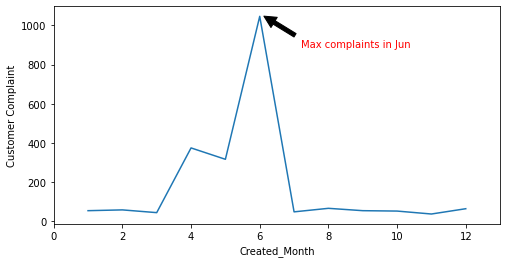

In [11]:
plt.figure(figsize=(8,4))
bymonth = df1.groupby('Created_Month').count().reset_index()
lp = sns.lineplot(x='Created_Month', y= 'Customer Complaint', data = bymonth, sort=False,markers = "o")
ax = lp.axes
ax.set_xlim(0,13)
ax.annotate('Max complaints in Jun', color='red',
            xy=(6, 1060), xycoords='data',
            xytext=(0.8, 0.85), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.1),
            horizontalalignment='right', verticalalignment='top')

(0.0, 32.0)

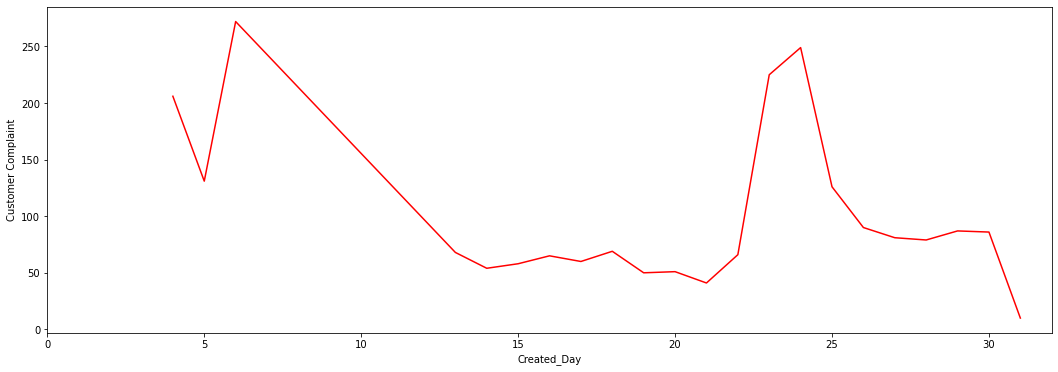

In [12]:
plt.figure(figsize=(18,6))
byday = df1.groupby('Created_Day').count().reset_index()
lp = sns.lineplot(x='Created_Day', y= 'Customer Complaint', data = byday, sort=False, color = 'red',markers = "o", )
ax = lp.axes
ax.set_xlim(0,32)

<AxesSubplot:xlabel='Created_Day of Week', ylabel='count'>

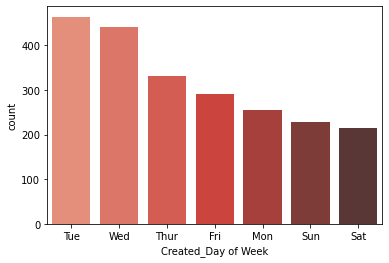

In [13]:
sns.countplot(x='Created_Day of Week', data = df1, order=df1['Created_Day of Week'].value_counts().index, palette ="Reds_d")

In [14]:
# TASK 2 - Provide a table with the frequency of complaint types.

In [15]:
df1['Customer Complaint'] = df1['Customer Complaint'].str.title() 
CT_freq = df1['Customer Complaint'].value_counts()
CT_freq

Comcast                                                            102
Comcast Data Cap                                                    30
Comcast Internet                                                    29
Comcast Data Caps                                                   21
Comcast Billing                                                     18
                                                                  ... 
Monthly Data Caps                                                    1
Comcast/Xfinity Poor Service, Fraudulent Billing And Collection      1
Lost Emails/Billing                                                  1
Improper Billing And Non Resolution Of Issues                        1
Comcast, Ypsilanti Mi Internet Speed                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

In [16]:
import nltk
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [17]:
from wordcloud import WordCloud, STOPWORDS
common_complaints = df1['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')

for word in list_stops:
    STOPWORDS.add(word)

In [18]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(common_complaints)

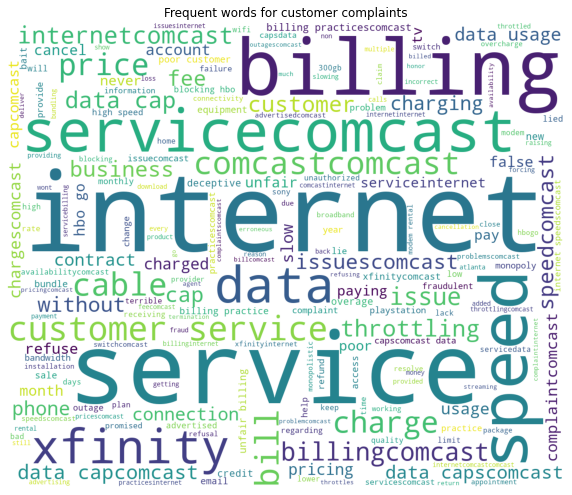

In [19]:
plt.figure( figsize=(10,12) )
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\ASHISH PRATAP
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [23]:
doc_complete = df1['Customer Complaint'].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

In [24]:
import gensim
from gensim import corpora
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

In [25]:
dictionary = corpora.Dictionary(doc_clean)
dictionary

In [26]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [27]:
from gensim.models import LdaModel

In [28]:
num_topic = 9
ldamodel = LdaModel(doc_term_matrix,num_topics=num_topic,id2word = dictionary,passes=10)

In [29]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.152*"service" + 0.072*"customer" + 0.055*"comcast" + 0.031*"billing" + 0.023*"high" + 0.020*"paying" + 0.019*"payment" + 0.015*"bad" + 0.014*"failure" + 0.014*"horrible"')

(1, '0.274*"internet" + 0.146*"comcast" + 0.106*"service" + 0.020*"issue" + 0.019*"cable" + 0.015*"problem" + 0.015*"business" + 0.014*"connectivity" + 0.011*"intermittent" + 0.010*"slowing"')

(2, '0.148*"billing" + 0.119*"comcast" + 0.049*"service" + 0.044*"issue" + 0.043*"practice" + 0.039*"unfair" + 0.030*"pricing" + 0.018*"monopolistic" + 0.017*"comcastxfinity" + 0.015*"monthly"')

(3, '0.189*"data" + 0.152*"cap" + 0.122*"comcast" + 0.035*"usage" + 0.022*"deceptive" + 0.016*"lack" + 0.015*"limit" + 0.013*"advertising" + 0.011*"switch" + 0.011*"bait"')

(4, '0.264*"comcast" + 0.092*"complaint" + 0.042*"service" + 0.024*"bill" + 0.017*"credit" + 0.014*"customer" + 0.011*"contract" + 0.010*"lied" + 0.009*"information" + 0.009*"claim"')

(5, '0.060*"comcast" + 0.057*"throttling" + 0.032*"day" + 0.025*"back" 

In [30]:
word_dict = {}
for i in range(num_topic):
    words = ldamodel.show_topic(i,topn = 20)
    word_dict['Topic '+"{}".format(i)]=[i[0] for i in words]

In [31]:
pd.DataFrame(word_dict)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
0,service,internet,billing,data,comcast,comcast,xfinity,comcast,speed
1,customer,comcast,comcast,cap,complaint,throttling,price,charge,internet
2,comcast,service,service,comcast,service,day,charged,without,service
3,billing,issue,issue,usage,bill,back,help,fee,comcast
4,high,cable,practice,deceptive,credit,connection,charging,bill,slow
5,paying,problem,unfair,lack,customer,service,comcast,outage,poor
6,payment,business,pricing,limit,contract,3,phone,monopoly,promised
7,bad,connectivity,monopolistic,advertising,lied,unreliable,2,account,cramming
8,failure,intermittent,comcastxfinity,switch,information,xfinitycomcast,sale,fraudulent,false
9,horrible,slowing,monthly,bait,claim,several,please,access,bill


In [32]:
import pyLDAvis.gensim_models

In [33]:
Lda_display = pyLDAvis.gensim_models.prepare(ldamodel,doc_term_matrix,dictionary,sort_topics=False)
pyLDAvis.display(Lda_display)

C:\Users\ASHISH PRATAP SINGH\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [34]:
# TASK 3 - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [35]:
df1['Highlevel_Status'] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df1["Status"]]

In [36]:
df1['Highlevel_Status'].unique()

array(['Closed', 'Open'], dtype=object)

In [37]:
# TASK 4 - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

In [38]:
df1['State'] = df1['State'].str.title() 
st_cmp = df1.groupby(['State','Highlevel_Status']).size().unstack().fillna(0)

In [39]:
st_cmp

Highlevel_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,15.0,2.0
Florida,201.0,39.0


<AxesSubplot:ylabel='State'>

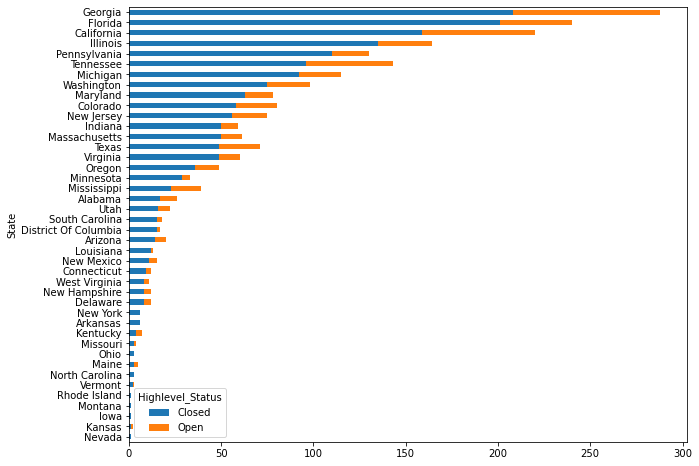

In [40]:
st_cmp.sort_values('Closed',axis = 0,ascending=True).plot(kind="barh", figsize=(10,8), stacked=True)

In [41]:
# TASK 5 - Which state has the maximum complaints Which state has the highest percentage of unresolved complaints

In [42]:
df1.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0: "Complaint count"}, axis=1)[:1]

,Complaint count
State,
Georgia,288


In [43]:
CT = df1.groupby(["State","Highlevel_Status"]).size().unstack().fillna(0)
CT.sort_values('Closed',axis = 0,ascending=False)[:1]

Highlevel_Status,Closed,Open
State,,
Georgia,208.0,80.0


In [44]:
CT['Resolved_cmp_prct'] = CT['Closed']/CT['Closed'].sum()*100
CT['Unresolved_cmp_prct'] = CT['Open']/CT['Open'].sum()*100

In [45]:
CT.sort_values('Unresolved_cmp_prct',axis = 0,ascending=False)[:1]

Highlevel_Status,Closed,Open,Resolved_cmp_prct,Unresolved_cmp_prct
State,,,,
Georgia,208.0,80.0,12.18512,15.473888


In [46]:
# TASK 6 --- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [47]:
cr = df1.groupby(['Received Via','Highlevel_Status']).size().unstack().fillna(0)
cr['resolved'] = cr['Closed']/cr['Closed'].sum()*100
cr['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64